# Dataset:
This is a template dataset in AIdea for Defect Classification of AOI.
Here is the link: <https://aidea-web.tw/>(AIdea).
## Data description:
The image data provided in this topic includes 6 categories (normal category + 5 defect categories)
Downloaded data aoi_data.zip contains:
-   train_images.zip: Image data (PNG format) required for training, a total of 2,528 images.
-   train.csv: contains 2 fields, ID and Label.
    -   ID: The file name of the image.
    -   Label: Defect classification category:
        -   0: normal
        -   1: void
        -   2: horizontal
        -   3: vertical defect
        -   4: edge defect
        -   5: particle
-   test_images.zip: Image data (PNG format) required for testing, a total of 10,142 images.
-   tets.csv: contain2 fields, ID and Label.
    -   ID: The file name of the image.
    -   Label: Defect classification category (its value can only be one of the following: 0,1,2,3,4,5)

In [1]:
# Step 1 Read the annotation file (CSV) to get the label and the path file to each image
# library: pandas
import pandas as pd
dir_aoi_data = "/Users/user/Victor2023/Dataset/aoi/train.csv"
df_train_csv = pd.read_csv(dir_aoi_data)


In [3]:
# Show the information of dataframe which is getting from train.csv file
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2528 non-null   object
 1   Label   2528 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.6+ KB


In [4]:
df_train_csv.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [16]:
df_train_csv['Label'].value_counts()

Label
0    674
5    644
1    492
3    378
4    240
2    100
Name: count, dtype: int64

In [6]:
# Some metadata information:
n_samples_trainset = len(df_train_csv)
print(n_samples_trainset)

2528


In [8]:
df_train_csv['ID'][0]

'train_00000.png'

In [9]:
import os
root_dir = "/Users/user/Victor2023/Dataset/aoi/train_images"
list_full_path = []
for i in range(len(df_train_csv)):
    path_img = os.path.join(root_dir,df_train_csv['ID'][i])
    list_full_path.append(path_img)


In [10]:
list_full_path[0]

'/Users/user/Victor2023/Dataset/aoi/train_images/train_00000.png'

In [11]:
import numpy as np
from PIL import Image
X = np.array([np.array(Image.open(path_img)) for path_img in list_full_path])

In [12]:
y = np.array(df_train_csv['Label'])

In [14]:
print(list_full_path[0])
print(y[0])

/Users/user/Victor2023/Dataset/aoi/train_images/train_00000.png
0


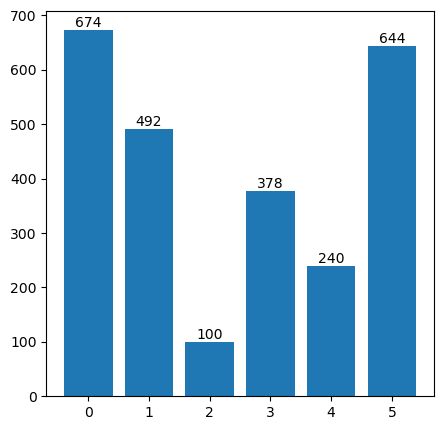

In [15]:
nb_classes = len(np.unique(y))
## Visual bar plot of number occurrences of each class:
import matplotlib.pyplot as plt
statistic_class = np.unique(y,return_counts=True)
categoricalClasses = [f'{C}' for C in statistic_class[0]]
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.bar(x = categoricalClasses, height = statistic_class[1],width = 0.8)
for i in range(nb_classes):
    ax.text(categoricalClasses[i],statistic_class[1][i],
            str(statistic_class[1][i]),ha='center',va = 'bottom')

In [18]:
Labels = ['normal', 'void', 'horizontal', 'vertical', 'edge', 'particle']

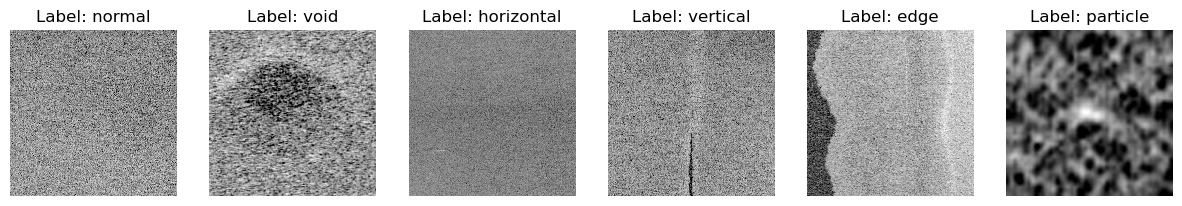

In [19]:
# Visualize one sample of each class
_, indices = np.unique(y,return_index=True) # get one index of each class
# Plot
_, axes = plt.subplots(nrows = 1,
                       ncols = len(indices),
                       figsize = (15,6))
for i in range(len(indices)):
    index = indices[i]
    axes[i].set_axis_off()
    axes[i].imshow(X[index], cmap = plt.cm.gray_r, interpolation= "nearest")
    axes[i].set_title(f"Label: {Labels[y[index]]}")
    